Project: Phishing Prevention for Twitter: Machine Learning Approach
Group 6:Daohui, Anish, Tejas and Ajinkya

In [64]:
import os                     # OS system library
from os.path import splitext  # OS library package to split URL into parts
import numpy as np            # numpy library for storing multi dimensional arrays
import matplotlib             # libary to plot graphs and visualize
import pandas as pd           # data set manipulation library
import ipaddress as ip        # library to detect IP address in URL
import tldextract             # library to separate TLD from domains in URL
try:                          # URL library to parse into string
    from urllib.parse import urlparse
except ImportError:
     from urlparse import urlparse

In [65]:
dataset = pd.read_csv("dataset1.csv")   # read the dataset file
dataset = dataset.sample(frac=1).reset_index(drop=True) # 10 percent random sampling from dataset, with no index in columns
# dataset.head(n=10) # display first N rows

In [66]:
Suspicious_TLD=['zip','cricket','link','work','party','gq','kim','country','science','tk']
Suspicious_Domain=['luckytime.co.kr','mattfoll.eu.interia.pl','trafficholder.com','dl.baixaki.com.br','bembed.redtube.comr','tags.expo9.exponential.com','deepspacer.com','funad.co.kr','trafficconverter.biz']

In [67]:
# Method to count number of delimeters
def countdelim(url):
    count = 0
    delim=[';','_','?','=','&']
    for each in url:
        if each in delim:
            count = count + 1
    return count
# Method to count number of dots
def countdots(url):  
    return url.count('.')
def isip(uri):
    try:
        if ip.ip_address(uri):
            return 1
    except:
        return 0
#method to check the presence of hyphens
def isPresentHyphen(url):
    return url.count('-')

#method to check the presence of @

def isPresentAt(url):
    return url.count('@')

def isPresentDSlash(url):
    return url.count('//')

def countSubDir(url):
    return url.count('/')

def get_ext(url):
    """Return the filename extension from url, or ''."""
    
    root, ext = splitext(url)
    return ext

def countSubDomain(subdomain):
    if not subdomain:
        return 0
    else:
        return len(subdomain.split('.'))

def countQueries(query):
    if not query:
        return 0
    else:
        return len(query.split('&'))


In [68]:
featureSet = pd.DataFrame(columns=('url','dots count','hyphen present','url length','at present',\
'double slash present','subdir count','subdomain count','domain length','queries count','IP present','suspicious TLD',\
'suspicious domain','label'))

In [69]:
def getFeatures(url, label): 
    result = []
    url = str(url)
    
    #add the url to feature set
    result.append(url)
    
    #parse the URL and extract the domain information
    path = urlparse(url)
    ext = tldextract.extract(url)
    
    #counting number of dots in subdomain    
    result.append(countdots(ext.subdomain))
    
    #checking hyphen in domain   
    result.append(isPresentHyphen(path.netloc))
    
    #length of URL    
    result.append(len(url))
    
    #checking @ in the url    
    result.append(isPresentAt(path.netloc))
    
    #checking presence of double slash    
    result.append(isPresentDSlash(path.path))
    
    #Count number of subdir    
    result.append(countSubDir(path.path))
    
    #number of sub domain    
    result.append(countSubDomain(ext.subdomain))
    
    #length of domain name    
    result.append(len(path.netloc))
    
    #count number of queries    
    result.append(len(path.query))
    
    #Adding domain information
    
    #if IP address is being used as a URL     
    result.append(isip(ext.domain))
    
    #presence of Suspicious_TLD
    result.append(1 if ext.suffix in Suspicious_TLD else 0)
    
    #presence of suspicious domain
    result.append(1 if '.'.join(ext[1:]) in Suspicious_Domain else 0 )
     
    result.append(str(label))
    
    return result

In [70]:
for i in range(len(dataset)):
    features = getFeatures(dataset["URL"].loc[i], dataset["Lable"].loc[i])    
    featureSet.loc[i] = features      

In [71]:
featureSet.head(n=2)

,url,dots count,hyphen present,url length,at present,double slash present,subdir count,subdomain count,domain length,queries count,IP present,suspicious TLD,suspicious domain,label
0,http://www.brighter.com.hk/,0.0,0.0,27.0,0.0,0.0,1.0,1.0,19.0,0.0,0.0,0.0,0.0,0
1,http://www.kloshpro.com/js/db/a/db/e/7/dropbx....,0.0,0.0,61.0,0.0,0.0,8.0,1.0,16.0,0.0,0.0,0.0,0.0,1


In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
from __future__ import division

Lets visualize the data

 URL length Distributions of both Malicious as well as Benign URLs. 

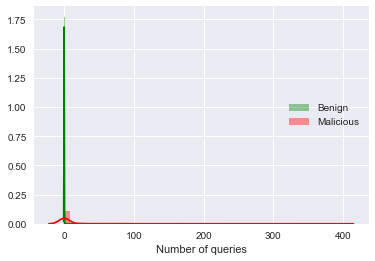

In [173]:
sns.set(style="darkgrid")
sns.distplot(featureSet[featureSet['label']=='0']['queries count'],color='green',label='Benign')
sns.distplot(featureSet[featureSet['label']=='1']['queries count'],color='red',label='Malicious')
plt.legend(loc='center right')
plt.xlabel('Number of queries')
plt.show()

Number of Dots Distributions of both Malicious as well as Benign URLs.

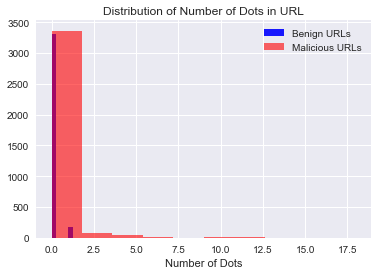

In [76]:
x=featureSet[featureSet['label']=='0']['dots count']
y=featureSet[featureSet['label']=='1']['dots count']
plt.hist(x,bins=8, alpha=0.9, label='Benign URLs',color='blue')
#sns.distplot(x,bins=8,color='blue',label='Benign URLs')
plt.hist(y,bins=10, alpha=0.6, label='Malicious URLs',color='red')
#sns.distplot(y,bins=8,color='red',label='Malicious URLs')
plt.legend(loc='upper right')
plt.xlabel('Number of Dots')
plt.title('Distribution of Number of Dots in URL')
plt.show()

Domain length Distributions of both Malicious as well as Benign URLs.

In [77]:
# sns.set(style="darkgrid")
# sns.distplot(featureSet[featureSet['label']=='0']['len of domain'],color='blue',label='Benign URLs')
# sns.distplot(featureSet[featureSet['label']=='1']['len of domain'],color='red',label='Malicious URLs')
# #sns.plt.title('Domain Length Distribution')
# plt.legend(loc='upper right')
# plt.xlabel('Length of Domain/Host')
# plt.show()

I can query minimal URL's per day using whois to get domain information. Waiting to get complete feature set, hence commented out

In [78]:
import sklearn.ensemble as ek
from sklearn import cross_validation, tree, linear_model
from sklearn.feature_selection import SelectFromModel
from sklearn.externals import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LogisticRegression


Let's just see the number of Benign and Phishin/Malicious emails

In [79]:
featureSet.groupby(featureSet['label']).size()

label
0    3494
1    3536
dtype: int64

Separate label and feature set. It would have been nice if I had domain features too. 

In [80]:
X = featureSet.drop(['url','label'],axis=1).values
y = featureSet['label'].values

### Time for Machine Learning

In [130]:
model = { "DecisionTree":tree.DecisionTreeClassifier(max_depth=10),
         "RandomForest":ek.RandomForestClassifier(n_estimators=50),
         "Adaboost":ek.AdaBoostClassifier(n_estimators=50),
         "GradientBoosting":ek.GradientBoostingClassifier(n_estimators=50),
         "GNB":GaussianNB(),
         "LogisticRegression":LogisticRegression()   
}

##### cross validation

In [131]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y ,test_size=0.2)

In [132]:
results = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print ("%s : %s " %(algo, score))
    results[algo] = score

LogisticRegression : 0.843527738265 
RandomForest : 0.889758179232 
GradientBoosting : 0.881934566145 
GNB : 0.692034139403 
DecisionTree : 0.894736842105 
Adaboost : 0.878378378378 


In [133]:
winner = max(results, key=results.get)
print(winner)
# winner = "DecisionTree"

DecisionTree


In [134]:
clf = model[winner]
res = clf.predict(X)
mt = confusion_matrix(y, res)
print("False positive rate : %f %%" % ((mt[0][1] / float(sum(mt[0])))*100))
print('False negative rate : %f %%' % ( (mt[1][0] / float(sum(mt[1]))*100)))

False positive rate : 6.954780 %
False negative rate : 6.674208 %


### Testing

Let's test' some of the malicious URL's listed in Trend Micro's website. http://apac.trendmicro.com/apac/security-intelligence/current-threat-activity/malicious-top-ten/

In [139]:
result = pd.DataFrame(columns=('url','no of dots','presence of hyphen','len of url','presence of at',\
'presence of double slash','no of subdir','no of subdomain','len of domain','no of queries','is IP','presence of Suspicious_TLD',\
'presence of suspicious domain','label'))

results = getFeatures('http://tdngrdgdc.blogspot.ru', '0')
# results = getFeatures('http://www.google.com/', '1')
result.loc[0] = results
result = result.drop(['url','label'],axis=1).values

print(clf.predict(result))

['1']


Success! One more time :) 

In [151]:
import json
import codecs
import os
import shutil
import requests
from collections import Counter


global depth
global dir_id
global counter
global counter_blacklist
global url_link
global url_profile
global total_list
global google_status
global phishtank_status
global urlblacklist_status

url_profile=""
url_link=""
total_list=[]
depth=0
counter=0
counter_blacklist=0
dir_id=""
google_status = False
phishtank_status = False
urlblacklist_status = False

def init_auto():
    global dir_id
    global depth
    global counter
    global counter_blacklist
    global url_profile
    global google_status
    global phishtank_status
    global urlblacklist_status
    
    while depth<3:
        dir_depth = 'E:/Twitter/Depth-%d' % depth
        list_dir = os.listdir(dir_depth)
       
        for doc in list_dir:
            ## Initialize/Reset the condition flags.
            google_status = False
            phishtank_status = False
            urlblacklist_status = False
            dir_count()
            counter +=1
            print "User id    : ",str(doc)

            dir_id = '%s/%s' % (dir_depth,str(doc))
            os.system('cls' if os.name == 'nt' else 'clear')
            
            xtract_url()
    
            urlList = url_link.split('\n')

            for subURL in urlList:
                result = pd.DataFrame(columns=('url','no of dots','presence of hyphen','len of url','presence of at',\
                'presence of double slash','no of subdir','no of subdomain','len of domain','no of queries','is IP','presence of Suspicious_TLD',\
                'presence of suspicious domain','label'))
                
                results = getFeatures(str(subURL), str(1))
                print "URL: ", subURL
                result.loc[0] = results
                result = result.drop(['url','label'],axis=1).values
#                 print(clf.predict(result))
                out = int(str(clf.predict(result))[2])
                if out: 
                    print "*** MALICIOUS ***"
                else: print "*** BENIGN ***"
                
                print "----------------------------------------------------------------"

        depth +=1

def xtract_url():
    global url_link
    global total_list
    total_list = []
    url_link=""
    try:
        url_count=0
        c=0
        dir_tweet = '%s/tweets.dump' % dir_id
        jfile2 = codecs.open(dir_tweet,'rb','utf-8')
        print("Extracting URL from tweets.... (Max: 490)")
        print("Resolving URL......")
        for jdoc in jfile2:
            jobj = json.loads(jdoc)
            list_url = jobj['entities']['urls']
            for url in list_url:
                                
                url = str(url['expanded_url'])
                total_list.append(url)
                url_link = url_link + url+"\n"
                url_count+=1
                
            if url_count> 490:
                break
                
        #url_link = "%d\n%s" %(url_count,url_link)
        jfile2.close()
        #print("URL Count :",url_count)
        #print("")
    except FileNotFoundError as e:
        print(e, " in extract tweets")
        

def dir_count():
    global counter_blacklist

    counter_blacklist = len(os.listdir("E:/Classify/Blacklist/"))

def decision(user):
    if (google_status is True) or (phishtank_status is True) or (urlblacklist_status is True):
        list_l = os.listdir(dir_id)
        dst_dir = "E:/Classify/Blacklist/%s" % user
        os.makedirs(dst_dir)
        for file in list_l:
            src_f = "%s/%s" %(dir_id,file)
            dst_f = "%s/%s" %(dst_dir,file)
            shutil.move(src_f, dst_f)
        os.rmdir(dir_id)
        return True

init_auto()

User id    :  86953262
Extracting URL from tweets.... (Max: 490)
Resolving URL......
URL:  http://bing.com
*** BENIGN ***
----------------------------------------------------------------
URL:  http://rutgers.com
*** BENIGN ***
----------------------------------------------------------------
URL:  http://facebook.com
*** BENIGN ***
----------------------------------------------------------------
URL:  http://twitter.com
*** BENIGN ***
----------------------------------------------------------------
URL:  http://tdngrdgdc.blogspot.ru
*** MALICIOUS ***
----------------------------------------------------------------
URL:  http://linkedin.com
*** BENIGN ***
----------------------------------------------------------------
URL:  http://wikipedia.com
*** BENIGN ***
----------------------------------------------------------------
URL:  http://google.com/wikipedia
*** MALICIOUS ***
----------------------------------------------------------------
URL:  http://davaoblog.com/id/onlin/nn.nz/index.h